Actividad Semanal -- 9

Genaro Rodriguez Vazquez A01150931

Javier Rodríguez Rudas A01793817

Ciencia y analítica de Datos

Profesor: Dr. Jobish Vallikavungal Devassia  

14 Noviembre 2022






In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#For pipeline creation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

#For scoring RMSE, MAE y MAPE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import cross_validate 
from sklearn.metrics import mean_absolute_percentage_error

#Gridsearch and importance
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import power_transform
from sklearn.impute import SimpleImputer
import math as math


from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.model_selection import learning_curve, validation_curve
from sklearn import metrics
from sklearn.metrics import roc_curve,plot_roc_curve, balanced_accuracy_score
import seaborn as sns
from matplotlib import rcParams

import geopandas as gpd
from  geopandas import GeoDataFrame
from shapely.geometry import Point

scaler = StandardScaler()
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")

In [3]:
#df contiene nuestro dataframe original
df = pd.read_csv('Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', 
                    index_col=None ,encoding='utf-8',encoding_errors='ignore')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [4]:
df.describe(include='all')

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068,1068,1068,1068,1068,1068,1068,1068.000000,1068.000000,1068.0,1064.000000,1064,1062.000000,1062,0.0,1066,1066,1066,1068,1068,1067,1067,1068,1068,1067,1067,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,634,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,1068,1066,13,32,452,273,8,NaN,NaN,NaN,NaN,4,NaN,5,NaN,925,5,4,862,4,889,4,125,5,995,3,209,3,3,2,168,2,61,2,31,2,362,3,615,2,3,126,3,3,3,3,2,3,2,3,2,2,2,2,2,2,2
top,DLAGU6,EL FUERTE,CUENCAS CENTRALES DEL NORTE,DURANGO,LA PAZ,PENINSULA DE YUCATAN,POZO,NaN,NaN,NaN,NaN,Alta,NaN,Permisible para riego,NaN,496,Excelente para riego,Potable - Dulce,<0.2,Baja,<20,Potable - Dura,<1.1,Potable - Excelente,<0.02,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,1,2,232,121,27,119,1039,NaN,NaN,NaN,NaN,794,NaN,460,NaN,4,491,834,162,434,26,577,737,739,65,788,815,816,1066,1066,854,1053,968,1067,1038,1056,545,982,401,932,434,78,1005,939,995,995,876,841,1007,985,941,1066,1053,1067,1056,982,932
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.891007,23.163618,2020.0,235.633759,NaN,1138.953013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.703263,3.887670,0.0,116.874291,NaN,1245.563674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-116.664250,14.561150,2020.0,26.640000,NaN,50.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-105.388865,20.212055,2020.0,164.000000,NaN,501.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-102.174180,22.617190,2020.0,215.527500,NaN,815.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-98.974716,25.510285,2020.0,292.710000,NaN,1322.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    Separando training-validation and test datasets. 
    Removiendo variables con valores unicas asi como estaticas, columnas vacias, etc.
    Se separa variable de salida.

In [5]:
y = df[['CALIDAD_MN']]
X = df.drop(columns=['CALIDAD_MN', 'CLAVE', 'PERIODO', 'SITIO','SDT_mg/L',])

#Replacing all the "<" chars from all the columns, to make possible the numeric imputation
X.replace('\<', '', regex=True, inplace=True)

Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=.15, random_state=0)

    Creamos el pipeline para normalizar, e imputar datos faltantes

In [6]:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(missing_values=np.nan, strategy= 'mean', fill_value = 0)),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L',
'FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']



catImp_pipeline =  Pipeline(steps= [#('si1',SimpleImputer(strategy='constant',fill_value='NAN')),
                                    ('si2', SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=np.nan))])

catImp_pipeline_nombres = list(X.drop(columns=['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L',
'FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']))


#catImp_pipeline_nombres                                                                                                                   

In [7]:
preprocessor = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        #('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        ], remainder='passthrough')


XtrainvalTransf = preprocessor.fit_transform(Xtv)

#optional
XtrainvalTransf_asDataFrame = pd.DataFrame(XtrainvalTransf)

New_Labels_X=['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L',
'FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO', 'SUBTIPO', 'CALIDAD_ALC', 'CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CALIDAD_FLUO', 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3', 'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_ALC',
 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE']

XtrainvalTransf_asDataFrame.columns = New_Labels_X

XtrainvalTransf_asDataFrame.head(3)
#df.query('2 == "MANANTIAL EL TESORERO"')

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,1.61876,1.253717,1.034102,1.024383,1.003323,1.0,1.030601,1.0,1.047451,1.0,1.0,1.003059,1.0,1.0,1.0,1.000097,BALSAS,TLAXCALA,PAPALOTLA DE XICOHTENCATL,ALTO ATOYAC,POZO,Media,Buena para riego,Excelente para riego,Potable - Dulce,Baja,Potable - Dura,Potable - Excelente,Potable - Buena calidad,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,"DT,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,1.1992,1.82397,1.127215,1.054978,1.006839,1.017196,1.064865,1.0,1.050024,1.002714,1.0,1.0,1.0,1.0,1.0,1.000135,NOROESTE,SONORA,SAN MIGUEL DE HORCASITAS,RIO SAN MIGUEL,POZO,Alta,Permisible para riego,Cultivos sensibles,Potable - Dulce,Media,Potable - Dura,Potable - Excelente,Potable - Buena calidad,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,"DT,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,1.578021,1.574813,1.106668,1.122977,1.012992,1.018523,1.173919,1.0,1.019321,1.0,1.0,1.0,1.0,1.0,1.0,1.0,RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,Alta,Permisible para riego,Cultivos con manejo especial,Ligeramente salobres,Media,Muy dura e indeseable usos industrial y domestico,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Amarillo,"DT,",SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI


    Veamos como se ve el mismo renglon, antes y despues de nuestro pipeline de transformacion, observar la columna "CALIDAD_ALC" como cambia de ser  NaN a "ALTA" (most_frequent). Ademas, observamos como todos los valores cuantitativos han sido escalados al valor minimo y maximo de todos ellos dentro del dataset.

In [8]:
df.query('ACUIFERO == "VALLE SANTIAGO-SAN BLAS"')

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
407,DLNAY1895,"MANANTIAL ""EL TESORERO""",PACIFICO NORTE,NAYARIT,SANTIAGO IXCUINTLA,VALLE SANTIAGO-SAN BLAS,POZO,-105.08064,21.8476,2020,NaN,NaN,50.4,Excelente para riego,NaN,<25,Excelente para riego,Potable - Dulce,<0.2,Baja,<20,Potable - Suave,31,Buena calidad,0.124414,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.0152,Potable - Excelente,0.2206,Potable - Excelente,Verde,NaN,ND,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [9]:
XtrainvalTransf_asDataFrame.query('ACUIFERO == "VALLE SANTIAGO-SAN BLAS"')

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
479,1.38871,1.402198,1.129663,1.0,1.0,1.0,1.0,1.001236,1.000863,1.0,1.0,1.0,1.0,1.0,1.001526,1.001095,PACIFICO NORTE,NAYARIT,SANTIAGO IXCUINTLA,VALLE SANTIAGO-SAN BLAS,POZO,Alta,Excelente para riego,Excelente para riego,Potable - Dulce,Baja,Potable - Suave,Buena calidad,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,"DT,",ND,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


    El siguiente pareto de histogramas de datos cateogoricos, nos ayyudara a saber si podemos agrupar algunos de ellos, esto con el fin de reducir la cantidad de variables de entrada de nuestro modelo. Aqui observamos que SITIO, MUNICIPIO y ACUIFERO tienen datos unicos, es decir son irrelevantes para el modelo (pues tienen alta variabilidad)

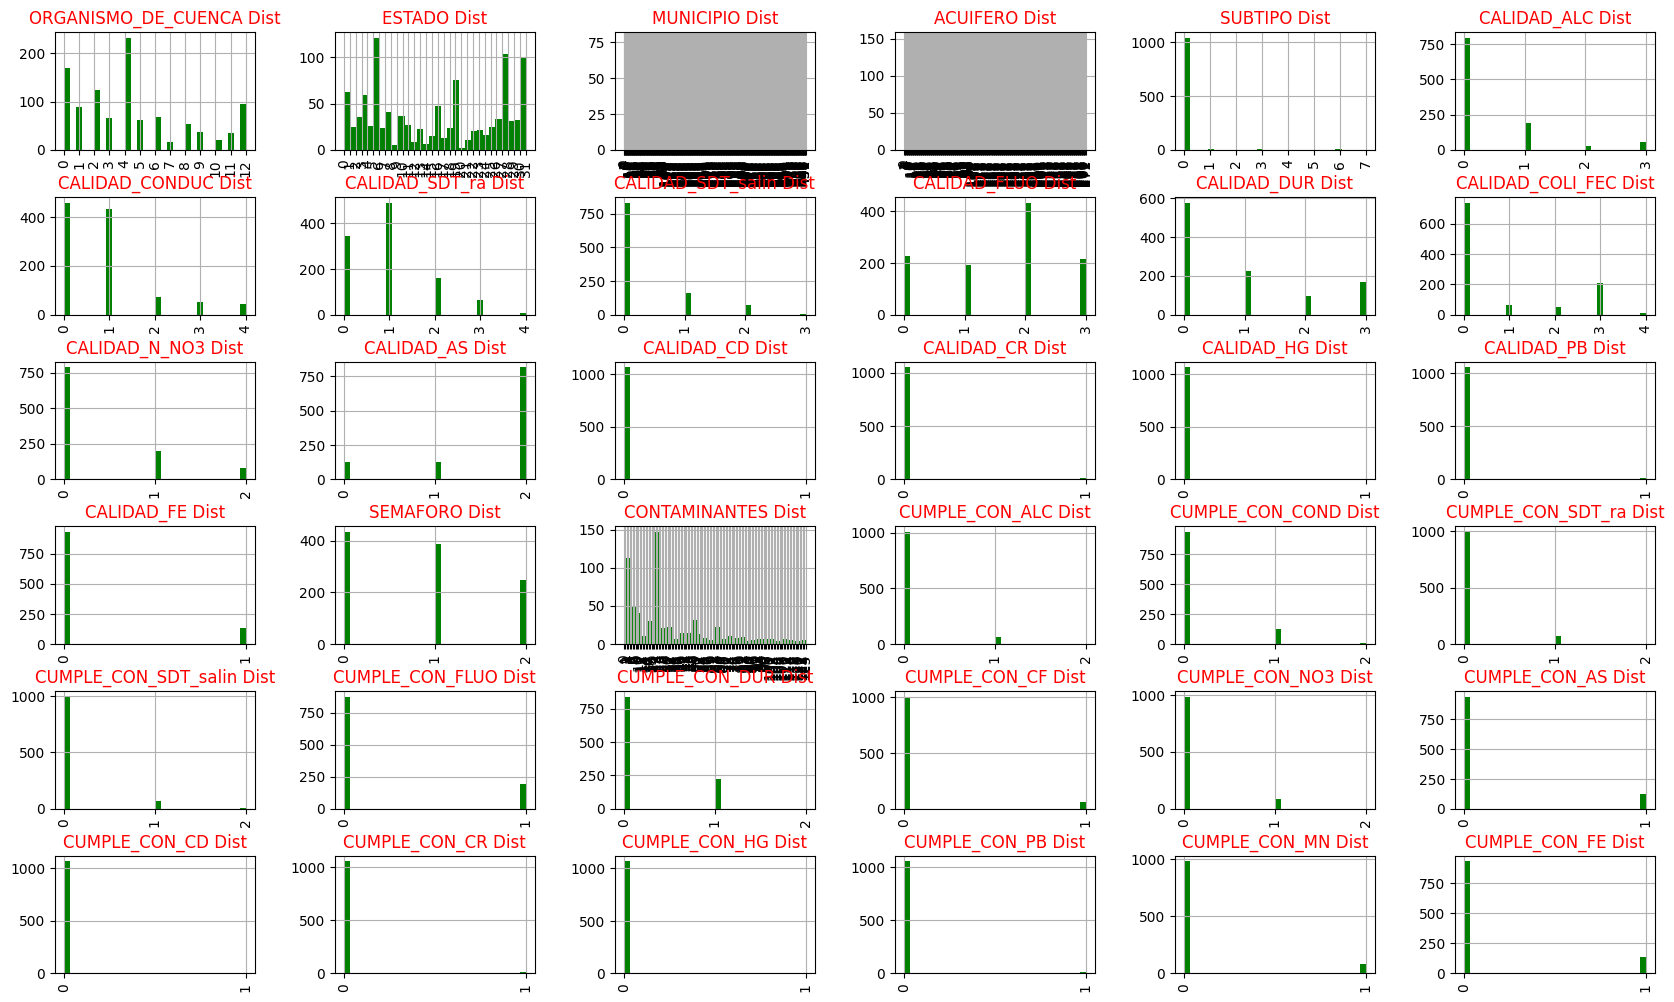

In [10]:
# Checking categorical variables distribution
fig=plt.figure(figsize=(20,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i, feature in enumerate(catImp_pipeline_nombres):
    ax=fig.add_subplot(10,6,i+1)
    X[feature].hist(bins=30,ax=ax,facecolor='green')
    ax.set_title(feature+" Dist",color='red')
    #ax.set_xticklabels(ax.get_xticks(), rotation = 90)
    ax.set_xticklabels(ax.get_xticks(), rotation=90)

fig.tight_layout(pad=50.0)  
plt.show();

In [11]:
XtrainvalTransf_asDataFrame.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,907.000000,907.000000,907.000000,907.00000,907.000000,907.0,907.0,907.0,907.0,907.0,907.0,907.0,907.0,907.0,907.0,907.0,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907,907
unique,905.000000,906.000000,715.000000,711.00000,799.000000,733.0,769.0,115.0,848.0,178.0,3.0,144.0,57.0,25.0,313.0,532.0,13,32,422,267,8,4,5,5,4,4,4,5,3,3,2,2,2,2,2,3,118,3,3,3,3,2,3,2,3,2,2,2,2,2,2,2
top,1.486218,1.257975,1.080685,1.04285,1.005734,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,CUENCAS CENTRALES DEL NORTE,DURANGO,ENSENADA,PENINSULA DE YUCATAN,POZO,Alta,Permisible para riego,Excelente para riego,Potable - Dulce,Baja,Potable - Dura,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,"DT,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,2.000000,2.000000,5.000000,4.00000,4.000000,138.0,23.0,617.0,55.0,697.0,905.0,732.0,831.0,883.0,465.0,334.0,196,104,23,101,880,679,394,415,709,364,490,618,670,697,905,893,906,898,793,376,436,853,796,847,847,750,710,855,840,804,905,893,906,898,836,793


Verificamos cuartiles y outliers de nuestros datos quantitativos

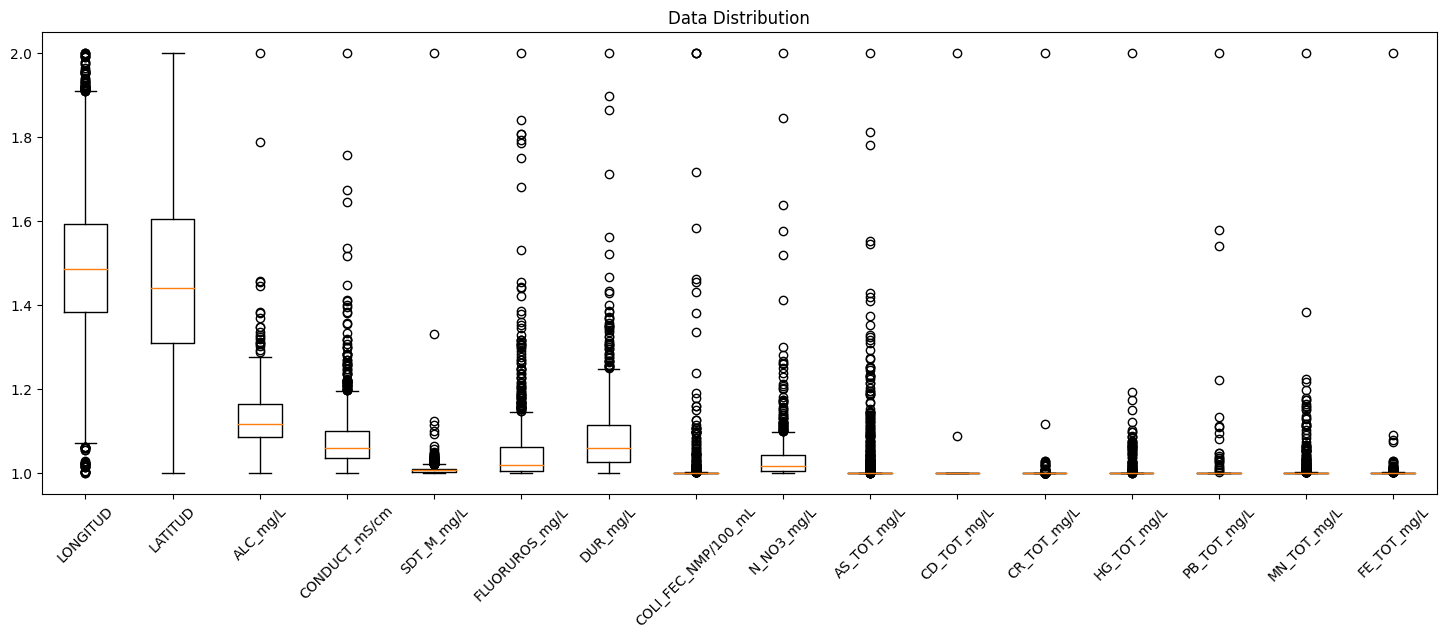

In [12]:
X = XtrainvalTransf_asDataFrame[['LONGITUD','LATITUD', 'ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L',
'FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]

plt.figure(figsize= (18, 6))
plt.boxplot(X, labels=X.columns)
plt.title("Data Distribution")
plt.xticks(rotation = 45);
plt.show()

In [13]:
#Verificfando que no existan datos nulos en nuestro dataset completo (transformado)
X.isnull().values.any()


False

Converting all "objects" (after column transformation) to numbers

In [14]:
X = X.apply(pd.to_numeric, errors='coerce')

Buscando correlacion entre variables cuantitativas

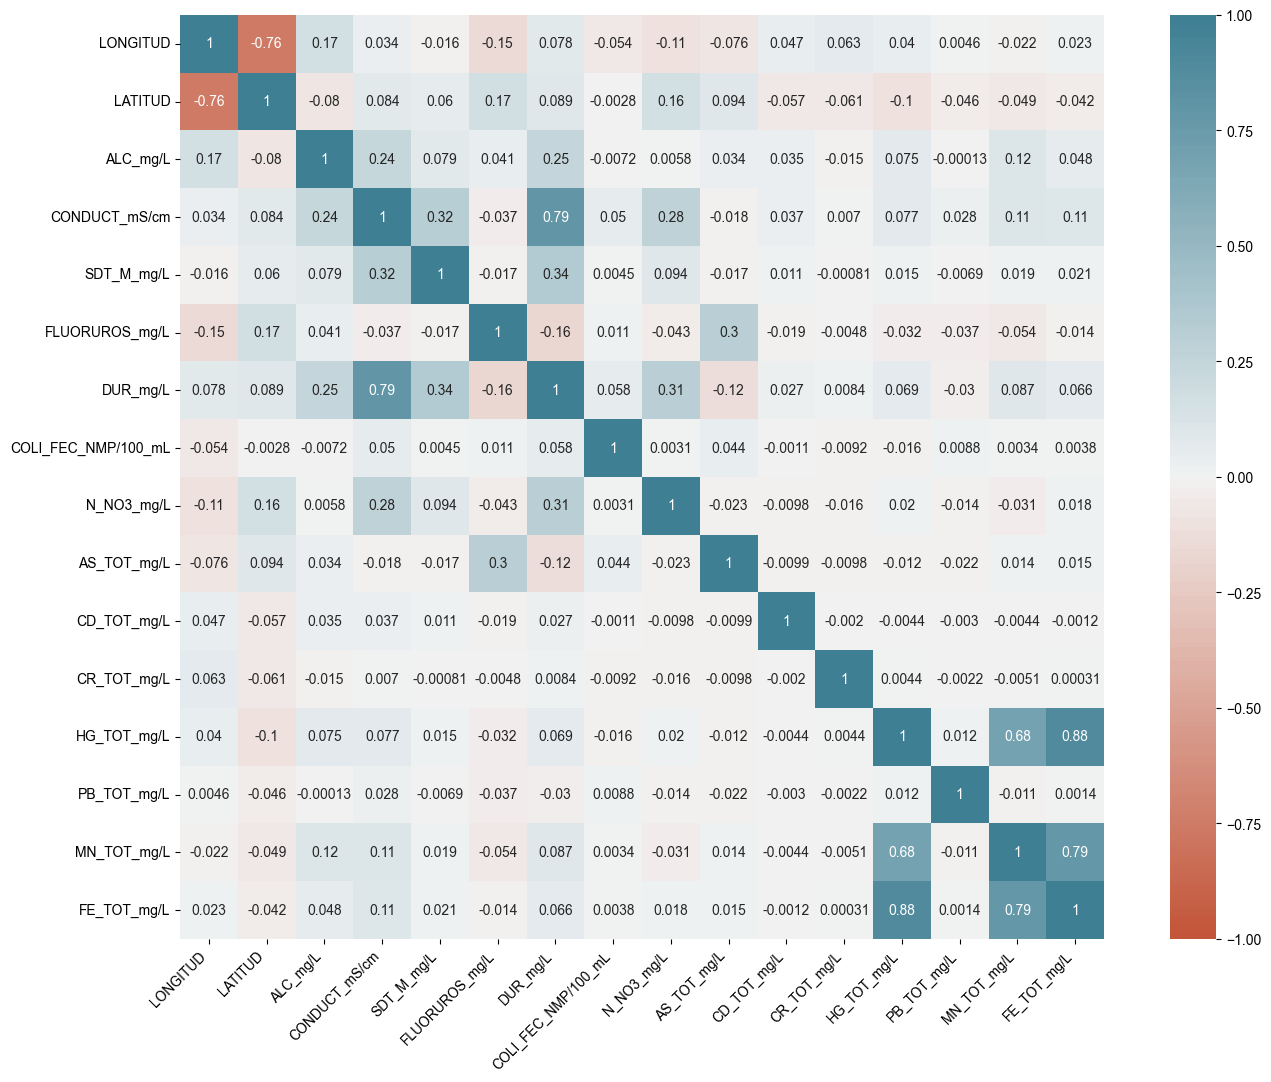

In [15]:
corr = X.corr()

fig, ax = plt.subplots(figsize=(17,12))  
ax = sns.heatmap(
    corr, annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
sns.set(font_scale=1.0) 
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [16]:
latlong=df[["LATITUD","LONGITUD"]]

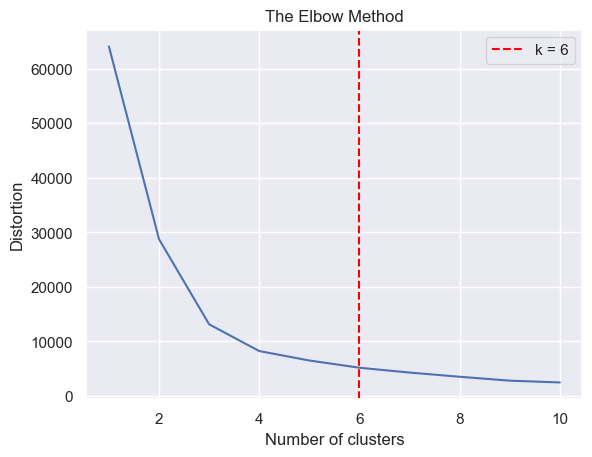

In [17]:
#tu codigo aquí
from sklearn import preprocessing, cluster

#Buscaremos los clusters dependiendo de su latitud y longitud combinada
X = latlong.copy()
max_k = 10## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

4 son los clusters que se observan mediante el metodo del codo

In [18]:
#Busquemos cuales son los centroides de los 4 clusters
k = 4

model = cluster.KMeans(n_clusters=k, init='k-means++')
X = latlong.copy() # Cluster
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X) ## Buscar los centroidees (Distancia mas corta a todas las tiendas a su alrededor)
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, dtf_X.drop("cluster", axis=1).values)
dtf_X["centroide"] = 0
for i in closest:
    dtf_X["centroide"].iloc[i] = 1
df[["cluster","centroide"]] = dtf_X[["cluster","centroide"]]

df.sample(5)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,cluster,centroide
84,DLCHI311,CASAS GRANDES 1,RIO BRAVO,CHIHUAHUA,CASAS GRANDES,CASAS GRANDES,POZO,-107.966730,30.263540,2020,102.93,Media,245.0,Excelente para riego,NaN,139.4,Excelente para riego,Potable - Dulce,1.9905,Alta,49.48,Potable - Suave,<1.1,Potable - Excelente,0.622853,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0587,Potable - Excelente,Rojo,"FLUO,",SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0
754,OCGNO5337,EJ. MIGUEL HIDALGO,GOLFO NORTE,TAMAULIPAS,SAN FERNANDO,MENDEZ-SAN FERNANDO,POZO,-98.105556,24.943278,2020,277.00,Alta,5335.0,Indeseable para riego,NaN,3688,Cultivos tolerantes,Salobres,0.978,Potable - Optima,1158,Muy dura e indeseable usos industrial y domestico,7,Buena calidad,7.477,Potable - Buena calidad,<0.01,Potable - Excelente,<0.003,Potable - Excelente,0.01089,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.04589,Potable - Excelente,3.03095,Sin efectos en la salud - Puede dar color al agua,Amarillo,"CONDUC,SDT_ra,SDT_salin,DT,FE,",SI,NO,NO,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI,NO,1,0
1020,OCPYU6401,CHOCHOLA,PENINSULA DE YUCATAN,YUCATAN,CHOCHOLA,PENINSULA DE YUCATAN,POZO,-89.829722,20.750833,2020,305.16,Alta,1999.0,Permisible para riego,NaN,1288,Cultivos con manejo especial,Ligeramente salobres,<0.2,Baja,773.65,Muy dura e indeseable usos industrial y domestico,<1.1,Potable - Excelente,1.7072,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.0032,Potable - Excelente,0.2937,Potable - Excelente,Amarillo,"DT,",SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI,2,0
750,OCGNO3643,POZO 112 CASA HOGAR MAMA PAULITA,GOLFO NORTE,TAMAULIPAS,EL MANTE,LLERA-XICOTENCATL,POZO,-99.011050,22.819730,2020,241.00,Alta,1601.0,Permisible para riego,NaN,1045,Cultivos con manejo especial,Ligeramente salobres,0.6204,Media,814,Muy dura e indeseable usos industrial y domestico,23,Buena calidad,0.088,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.36272,Sin efectos en la salud - Puede dar color al agua,0.13903,Potable - Excelente,Amarillo,"DT,MN,",SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,NO,SI,1,0
627,OCBAL2785,PLANCHUELAS,BALSAS,MORELOS,EMILIANO ZAPATA,CUERNAVACA,POZO,-99.175010,18.838210,2020,256.48,Alta,883.0,Permisible para riego,NaN,622,Cultivos sensibles,Potable - Dulce,0.2635,Baja,337.2711,Potable - Dura,417,Aceptable,5.438424,Potable - Buena calidad,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,1,0


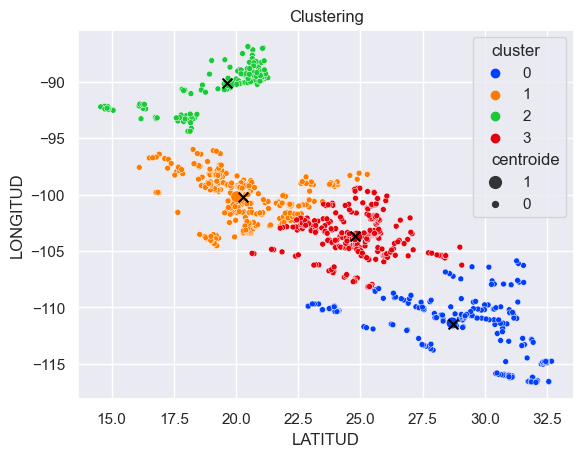

In [19]:
# Las X muestran los centroides (expresado en altitud y longitud)
fig, ax = plt.subplots()
rcParams['figure.figsize'] = 10,10
sns.scatterplot(x="LATITUD", y="LONGITUD", data=df, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroide", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering')
                
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', marker="x");

In [20]:
df["Coordinates"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordinates"] = df["Coordinates"].apply(Point)
#Dataframe now has the Coordinates columns as a point, neccessary for map plotting
#df.head()

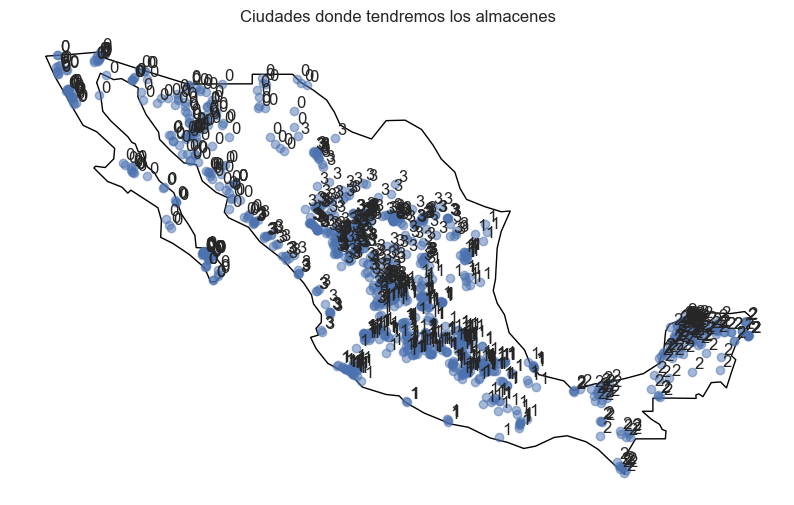

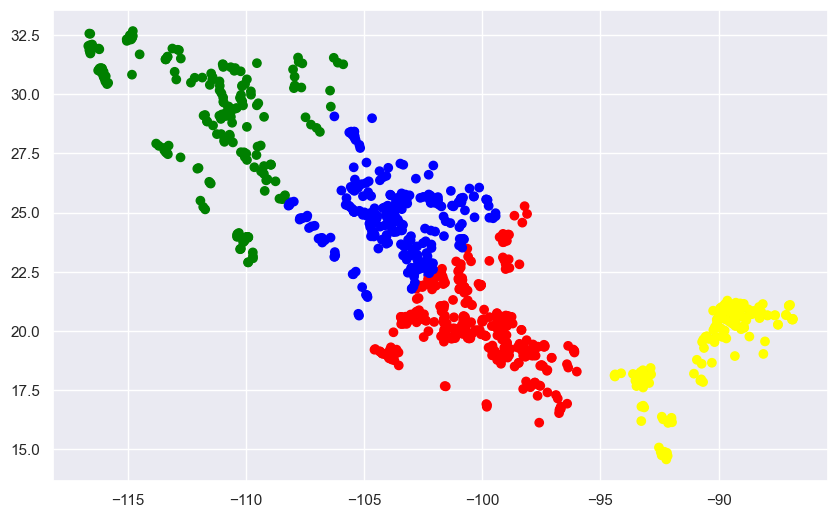

In [27]:


#Para graficarlos en un mapa
water_sectors = gpd.GeoDataFrame(df, geometry="Coordinates")
water_sectors.head()

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

water_sectors.plot(ax=gax, alpha = 0.5)
#water_sectors['color'] = ['#C62828', '#C62828', '#283593', '#FF9800', '#283593']
#water_sectors.plot(color=water_sectors['color']) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Calidad del agua por region')

# Kill the spines...
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# ...or get rid of all the axis. Is it important to know the lat and long?
plt.axis('off')

# Label the dots
for x, y, cluster_ in zip(water_sectors['Coordinates'].x, water_sectors['Coordinates'].y, water_sectors['cluster']):
    gax.annotate(cluster_, xy=(x,y), xytext=(2,2), textcoords='offset points')
    
color_mapping = {0: "green", 1: "red", 2: "yellow", 3: "blue"}

gax.plot(c=water_sectors["cluster"].map(color_mapping))  

water_sectors.plot(c=water_sectors["cluster"].map(color_mapping), legend= True)     
plt.show()

